In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_theme(context="notebook", style="darkgrid")


In [2]:
tb_census = pd.read_csv("data/acs2017_census_tract_data.csv", index_col=0)
tb_census = tb_census.dropna()

cluster_vars = [
    "IncomePerCapErr",
    "Poverty",
    "Professional",
    "Service",
    "Office",
    "Construction",
    "Production",
    "OtherTransp",
    "WorkAtHome",
    "MeanCommute",
    "Employed",
    "PrivateWork",
    "PublicWork",
    "SelfEmployed",
]

In [6]:
census_scaler = StandardScaler()
census_scaler.fit(tb_census[cluster_vars])

tb_sca_census = pd.DataFrame(census_scaler.transform(tb_census[cluster_vars]), columns = cluster_vars)

# Hierarchical Clustering

1. *Affinity* (or distance function)
    - *Eucliden*
    - *Cosine*
1. ***Linkage***
    - **Maximum or complete linkage** minimizes the maximum distance between observations of pairs of clusters: Compute all pairwise distances between observations in cluster A and in cluster B, and record the largest of these distances.
    - **Average linkage** minimizes the average of the distances between all observations of pairs of clusters. Compute all pairwise distance between the observations in cluster A and cluster B and record the average of these distances.
    - **Single linkage** minimizes the distance between the closest observations of pairs of clusters. Compute all pairwise distance between the observations in clusterA and cluster B and record the smallest of these distances.
    - **Ward** minimizes the error sum of squares (also known as variance) of cluster combinations.

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

We can use SciPy for visualizing the dendogram:

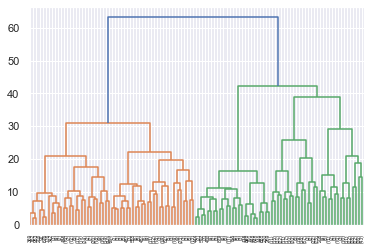

In [15]:
census_dendogram = dendrogram(linkage(tb_sca_census.sample(1000), method = 'ward'), p = 6, truncate_mode = 'level')

For calculating & fitting hierarchical clustering models we're better served by SKLEARN's `AgglomerativeClustering` class:

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
hc_fit = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='complete')
hc_fit.fit(tb_sca_census)
tb_census['clu_ward'] = hc_fit.predict(tb_sca_census)